In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import serial
import time

In [2]:
# Defining the serial COM
SerialObj = serial.Serial('COM5')

SerialObj.baudrate = 115200
SerialObj.bytesize = 8
time.sleep(3)

In [3]:
# Defining the batch size and image size
NUM_CLASS = 2
IMAGE_SIZE = (400, 400)
BATCH_SIZE = 32

In [4]:
# Load training data
def load_data(path):
    images = []
    labels = []
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path, filename))
        img = cv2.resize(img, IMAGE_SIZE)  # Resize images to a consistent size
        images.append(img)
        labels.append(path.split('/')[-1])  # Assuming the label is the name of the directory
    return images, labels

def test_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMAGE_SIZE)  # Resize image to match training data size
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    if np.argmax(prediction) == 0:
        print("Detected object: Apple")
    else:
        print("Detected object: Banana")

In [5]:
# Paths for the train data and the test data
apple_path = "C:/Users/zuzz4/OneDrive/Desktop/data new/train/Apple"
banana_path = "C:/Users/zuzz4/OneDrive/Desktop/data new/train/Banana"
test_path = "C:/Users/zuzz4/OneDrive/Desktop/data new/Test"

In [6]:
# Load training data by apples and bananas
apple_images, apple_labels = load_data(apple_path)
banana_images, banana_labels = load_data(banana_path)

# Combine data and labels
images = np.array(apple_images + banana_images)
labels = np.array(apple_labels + banana_labels)

label_dict = {'Apple': 0, 'Banana': 1}
labels = np.array([label_dict[label] for label in labels])

# Split data into training and testing to start training
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [7]:
# The Model layers
model = Sequential([
    Flatten(input_shape=(400, 400, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax'),
])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Choosing the compiler for the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Start training
# Checkpoint to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("feed_forward_nn_model.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Print test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)



Epoch 1/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.4670 - loss: 16957.1152
Epoch 1: val_accuracy improved from -inf to 0.53659, saving model to feed_forward_nn_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4656 - loss: 17248.2070 - val_accuracy: 0.5366 - val_loss: 25357.9160
Epoch 2/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.5643 - loss: 23604.9355
Epoch 2: val_accuracy did not improve from 0.53659
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - accuracy: 0.5622 - loss: 23153.4297 - val_accuracy: 0.4634 - val_loss: 20937.7188
Epoch 3/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.5442 - loss: 17061.4258
Epoch 3: val_accuracy improved from 0.53659 to 0.82927, saving model to feed_forward_nn_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5459 - loss: 16571.0273 - val_accuracy: 0.8293 - val_loss: 496.4287
Epoch 4/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.7433 - loss: 1381.5986
Epoch 4: val_accuracy did not improve 

In [25]:
# Camera Code to capture the photo for testing
import cv2
import os
import time

def capture_and_save_image(folder_path):
    # Create the folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Open the default camera (usually 0)
    cap = cv2.VideoCapture(0)

    # Check if the camera is opened successfully
    if not cap.isOpened():
        print("Error: Unable to open camera")
        return

    # Allow the camera to adjust to the lighting conditions (1-second delay)
    time.sleep(1)

    # Capture frame-by-frame
    ret, frame = cap.read()

    # Display the captured frame
    cv2.imshow('Captured Image', frame)
    
    # Save the image to the specified folder path
    image_path = os.path.join(folder_path, 'captured_image.jpg')
    cv2.imwrite(image_path, frame)
    
    print("Image saved successfully at:", image_path)

    # Release the camera and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

# Specify the folder path where the image will be saved
folder_path = r"C:/Users/zuzz4/OneDrive/Desktop/data new/Test"

# Call the function to capture and save the image
capture_and_save_image(folder_path)


Image saved successfully at: C:/Users/zuzz4/OneDrive/Desktop/data new/Test\captured_image.jpg


In [26]:
# Load test images using tf.keras.preprocessing.image_dataset_from_directory
test_dataset_path = "C:/Users/zuzz4/OneDrive/Desktop/data new/Test"
test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_path,
    labels=None,
    color_mode='rgb',
    label_mode=None,
    shuffle=False,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 1 files.


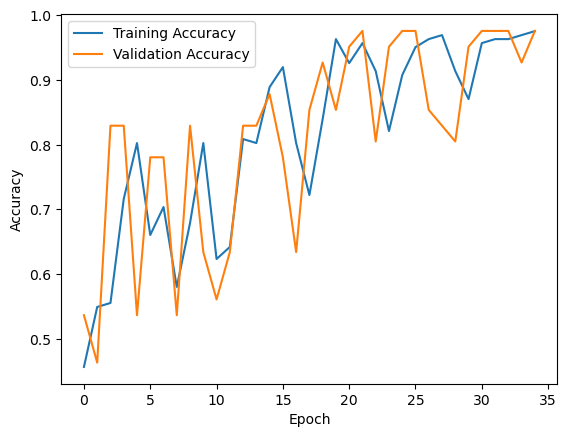

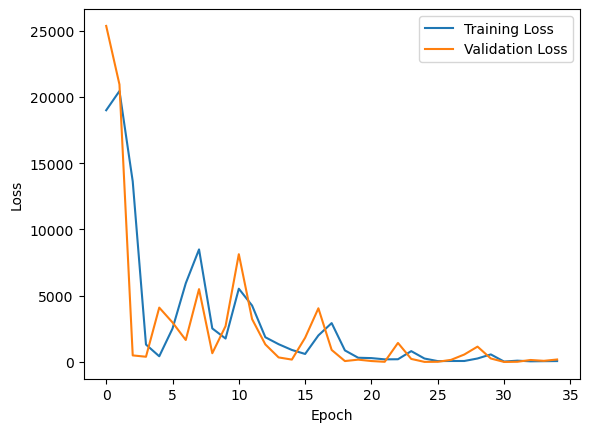

In [12]:
# Plotting Cell
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
# Make predictions on test images
print("\nPredictions on test images:")
for images in test_images:
    result = model.predict(images)
    print(result)    


Predictions on test images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[1. 0.]]


In [28]:
# Control for the ServoMotors
if (result[0][0] >= 0.7) and  (result[0][1] <= 0.5) :
    SerialObj.write(b'1')
elif (result[0][1] >= 0.7) and  (result[0][0] <= 0.5):
    SerialObj.write(b'2')
       